In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from  IPython import display
import pathlib
import shutil
import tempfile
import sklearn.metrics

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
raw_dataset = pd.read_csv('/Users/katana/PycharmProjects/TPM/results/immuneSubtypes_immuneLandscape.csv')
dataset_orig = raw_dataset.copy()
dataset_orig.head()

,Unnamed: 0,X.1,X,ParticipantBarcode,Study,leukocyte_fraction,Subclonal_genome_fraction,Stromal_Fraction,mutationrate_silent_per_Mb,mutationrate_nonsilent_per_Mb,...,geom_HLAII_upregulation,geom_high_HLAIupreg,geom_high_HLAIIupreg,geom_high_HLAI,geom_high_HLAII,highCYT,highHLAI75,B2M_log,B2M_log_N,immune_subtype
0,1,1,355,TCGA-BP-4352,KIRC,0.147285,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,5.615063,NaN,1
1,2,2,607,TCGA-BP-4985,KIRC,0.214478,0.10,0.56,0.723270,2.054088,...,NaN,NaN,NaN,True,True,True,True,9.857609,NaN,1
2,3,3,681,TCGA-G6-A8L7,KIRC,0.320622,0.07,0.51,0.422155,1.415459,...,NaN,NaN,NaN,False,False,True,False,7.253644,NaN,1
3,4,4,825,TCGA-B0-5098,KIRC,0.176996,0.01,0.29,4.881514,16.051566,...,NaN,NaN,NaN,True,False,False,False,9.163109,NaN,1
4,5,5,1570,TCGA-B0-5109,KIRC,0.593089,0.08,0.74,0.142327,1.167078,...,NaN,NaN,NaN,True,True,True,False,9.535909,NaN,1


In [5]:
dataset=dataset_orig[['Study','highCYT75','HLA_A_log', 'HLA_B_log', 'HLA_C_log','HLA_E_log', 'HLA_G_log', 'B2M_log','HLA_DRA_log', 'HLA_DRB1_log', 'HLA_DQA1_log', 'HLA_DQB1_log', 'HLA_DPA1_log', 'HLA_DPB1_log', 'HLA_DMA_log', 'HLA_DMB_log', 'HLA_DOA_log', 'HLA_DOB_log']]

df_study = pd.get_dummies(dataset['Study'])
dataset = pd.concat([dataset, df_study], axis=1)
dataset.head()

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset = dataset.dropna()
dataset.shape
dataset['highCYT75']=dataset['highCYT75'].astype('uint8')
dataset.Study.unique()

array(['KIRC', 'LUAD', 'UCEC', 'THCA', 'LUSC', 'PRAD', 'HNSC', 'COAD',
       'SKCM', 'BLCA', 'LIHC', 'STAD', 'OV', 'KIRP', 'CESC', 'SARC',
       'PAAD', 'READ', 'GBM', 'ESCA', 'TGCT', 'KICH', 'MESO', 'ACC',
       'UCS', 'CHOL', 'BRCA', 'PCPG', 'LGG', 'UVM'], dtype=object)

In [6]:
# random sampling with the same fraction from each tumor type
ACC_df=dataset[dataset['Study']=='ACC']
ACC_train_dataset = ACC_df.sample(frac=0.6, random_state=0)
ACC_test_dataset = ACC_df.drop(ACC_train_dataset.index)

BLCA_df=dataset[dataset['Study']=='BLCA']
BLCA_train_dataset = BLCA_df.sample(frac=0.6, random_state=0)
BLCA_test_dataset = BLCA_df.drop(BLCA_train_dataset.index)

BRCA_df=dataset[dataset['Study']=='BRCA']
BRCA_train_dataset = BRCA_df.sample(frac=0.6, random_state=0)
BRCA_test_dataset = BRCA_df.drop(BRCA_train_dataset.index)

CESC_df=dataset[dataset['Study']=='CESC']
CESC_train_dataset = CESC_df.sample(frac=0.6, random_state=0)
CESC_test_dataset = CESC_df.drop(CESC_train_dataset.index)

CHOL_df=dataset[dataset['Study']=='CHOL']
CHOL_train_dataset = CHOL_df.sample(frac=0.6, random_state=0)
CHOL_test_dataset = CHOL_df.drop(CHOL_train_dataset.index)

COAD_df=dataset[dataset['Study']=='COAD']
COAD_train_dataset = COAD_df.sample(frac=0.6, random_state=0)
COAD_test_dataset = COAD_df.drop(COAD_train_dataset.index)

DLBC_df=dataset[dataset['Study']=='DLBC']
DLBC_train_dataset = DLBC_df.sample(frac=0.6, random_state=0)
DLBC_test_dataset = DLBC_df.drop(DLBC_train_dataset.index)

ESCA_df=dataset[dataset['Study']=='ESCA']
ESCA_train_dataset = ESCA_df.sample(frac=0.6, random_state=0)
ESCA_test_dataset = ESCA_df.drop(ESCA_train_dataset.index)

GBM_df=dataset[dataset['Study']=='GBM']
GBM_train_dataset = GBM_df.sample(frac=0.6, random_state=0)
GBM_test_dataset = GBM_df.drop(GBM_train_dataset.index)

HNSC_df=dataset[dataset['Study']=='HNSC']
HNSC_train_dataset = HNSC_df.sample(frac=0.6, random_state=0)
HNSC_test_dataset = HNSC_df.drop(HNSC_train_dataset.index)

KICH_df=dataset[dataset['Study']=='KICH']
KICH_train_dataset = KICH_df.sample(frac=0.6, random_state=0)
KICH_test_dataset = KICH_df.drop(KICH_train_dataset.index)

KIRC_df=dataset[dataset['Study']=='KIRC']
KIRC_train_dataset = KIRC_df.sample(frac=0.6, random_state=0)
KIRC_test_dataset = KIRC_df.drop(KIRC_train_dataset.index)

KIRP_df=dataset[dataset['Study']=='KIRP']
KIRP_train_dataset = KIRP_df.sample(frac=0.6, random_state=0)
KIRP_test_dataset = KIRP_df.drop(KIRP_train_dataset.index)

LGG_df=dataset[dataset['Study']=='LGG']
LGG_train_dataset = LGG_df.sample(frac=0.6, random_state=0)
LGG_test_dataset = LGG_df.drop(LGG_train_dataset.index)

LIHC_df=dataset[dataset['Study']=='LIHC']
LIHC_train_dataset = LIHC_df.sample(frac=0.6, random_state=0)
LIHC_test_dataset = LIHC_df.drop(LIHC_train_dataset.index)

LUAD_df=dataset[dataset['Study']=='LUAD']
LUAD_train_dataset = LUAD_df.sample(frac=0.6, random_state=0)
LUAD_test_dataset = LUAD_df.drop(LUAD_train_dataset.index)

LUSC_df=dataset[dataset['Study']=='LUSC']
LUSC_train_dataset = LUSC_df.sample(frac=0.6, random_state=0)
LUSC_test_dataset = LUSC_df.drop(LUSC_train_dataset.index)

MESO_df=dataset[dataset['Study']=='MESO']
MESO_train_dataset = MESO_df.sample(frac=0.6, random_state=0)
MESO_test_dataset = MESO_df.drop(MESO_train_dataset.index)

OV_df=dataset[dataset['Study']=='OV']
OV_train_dataset = OV_df.sample(frac=0.6, random_state=0)
OV_test_dataset = OV_df.drop(OV_train_dataset.index)

PAAD_df=dataset[dataset['Study']=='PAAD']
PAAD_train_dataset = PAAD_df.sample(frac=0.6, random_state=0)
PAAD_test_dataset = PAAD_df.drop(PAAD_train_dataset.index)

PCPG_df=dataset[dataset['Study']=='PCPG']
PCPG_train_dataset = PCPG_df.sample(frac=0.6, random_state=0)
PCPG_test_dataset = PCPG_df.drop(PCPG_train_dataset.index)

PRAD_df=dataset[dataset['Study']=='PRAD']
PRAD_train_dataset = PRAD_df.sample(frac=0.6, random_state=0)
PRAD_test_dataset = PRAD_df.drop(PRAD_train_dataset.index)


READ_df=dataset[dataset['Study']=='READ']
READ_train_dataset = READ_df.sample(frac=0.6, random_state=0)
READ_test_dataset = READ_df.drop(READ_train_dataset.index)

SARC_df=dataset[dataset['Study']=='SARC']
SARC_train_dataset = SARC_df.sample(frac=0.6, random_state=0)
SARC_test_dataset = SARC_df.drop(SARC_train_dataset.index)

SKCM_df=dataset[dataset['Study']=='SKCM']
SKCM_train_dataset = SKCM_df.sample(frac=0.6, random_state=0)
SKCM_test_dataset = SKCM_df.drop(SKCM_train_dataset.index)

STAD_df=dataset[dataset['Study']=='STAD']
STAD_train_dataset = STAD_df.sample(frac=0.6, random_state=0)
STAD_test_dataset = STAD_df.drop(STAD_train_dataset.index)

TGCT_df=dataset[dataset['Study']=='TGCT']
TGCT_train_dataset = TGCT_df.sample(frac=0.6, random_state=0)
TGCT_test_dataset = TGCT_df.drop(TGCT_train_dataset.index)

THCA_df=dataset[dataset['Study']=='THCA']
THCA_train_dataset = THCA_df.sample(frac=0.6, random_state=0)
THCA_test_dataset = THCA_df.drop(THCA_train_dataset.index)

THYM_df=dataset[dataset['Study']=='THYM']
THYM_train_dataset = THYM_df.sample(frac=0.6, random_state=0)
THYM_test_dataset = THYM_df.drop(THYM_train_dataset.index)

UCEC_df=dataset[dataset['Study']=='UCEC']
UCEC_train_dataset = UCEC_df.sample(frac=0.6, random_state=0)
UCEC_test_dataset = UCEC_df.drop(UCEC_train_dataset.index)

UCS_df=dataset[dataset['Study']=='UCS']
UCS_train_dataset = UCS_df.sample(frac=0.6, random_state=0)
UCS_test_dataset = UCS_df.drop(UCS_train_dataset.index)

UVM_df=dataset[dataset['Study']=='UVM']
UVM_train_dataset = UVM_df.sample(frac=0.6, random_state=0)
UVM_test_dataset = UVM_df.drop(UVM_train_dataset.index)

train_frames=[ACC_train_dataset,BLCA_train_dataset,BRCA_train_dataset,CESC_train_dataset,CHOL_train_dataset,COAD_train_dataset,DLBC_train_dataset,ESCA_train_dataset,GBM_train_dataset,HNSC_train_dataset,KICH_train_dataset,KIRC_train_dataset,KIRP_train_dataset,LGG_train_dataset,LIHC_train_dataset,LUAD_train_dataset,LUSC_train_dataset,MESO_train_dataset,OV_train_dataset,PAAD_train_dataset,PCPG_train_dataset,PRAD_train_dataset,READ_train_dataset,SARC_train_dataset,SKCM_train_dataset,STAD_train_dataset,TGCT_train_dataset,THCA_train_dataset,THYM_train_dataset,UCEC_train_dataset,UCS_train_dataset,UVM_train_dataset]
train_set=pd.concat(train_frames)
test_frames=[ACC_test_dataset,BLCA_test_dataset,BRCA_test_dataset,CESC_test_dataset,CHOL_test_dataset,COAD_test_dataset,DLBC_test_dataset,ESCA_test_dataset,GBM_test_dataset,HNSC_test_dataset,KICH_test_dataset,KIRC_test_dataset,KIRP_test_dataset,LGG_test_dataset,LIHC_test_dataset,LUAD_test_dataset,LUSC_test_dataset,MESO_test_dataset,OV_test_dataset,PAAD_test_dataset,PCPG_test_dataset,PRAD_test_dataset,READ_test_dataset,SARC_test_dataset,SKCM_test_dataset,STAD_test_dataset,TGCT_test_dataset,THCA_test_dataset,THYM_test_dataset,UCEC_test_dataset,UCS_test_dataset,UVM_test_dataset]
test_set=pd.concat(test_frames)

In [7]:
# exclude Study which is categorical
train_set.pop('Study')
test_set.pop('Study')
train_set.shape

(5390, 47)

In [8]:
train_features = train_set.copy()
test_features = test_set.copy()
features=train_features.columns


train_labels = train_features.pop('highCYT75')
test_labels = test_features.pop('highCYT75')

In [9]:
X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, criterion='gini')
score=clf.fit(X_train, y_train).score(X_test, y_test)
pred=clf.fit(X_train, y_train).predict_proba(X_test)

In [11]:
score

0.8717306622148024

In [12]:
features

Index(['highCYT75', 'HLA_A_log', 'HLA_B_log', 'HLA_C_log', 'HLA_E_log',
       'HLA_G_log', 'B2M_log', 'HLA_DRA_log', 'HLA_DRB1_log', 'HLA_DQA1_log',
       'HLA_DQB1_log', 'HLA_DPA1_log', 'HLA_DPB1_log', 'HLA_DMA_log',
       'HLA_DMB_log', 'HLA_DOA_log', 'HLA_DOB_log', 'ACC', 'BLCA', 'BRCA',
       'CESC', 'CHOL', 'COAD', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP',
       'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
       'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'UCEC', 'UCS', 'UVM'],
      dtype='object')

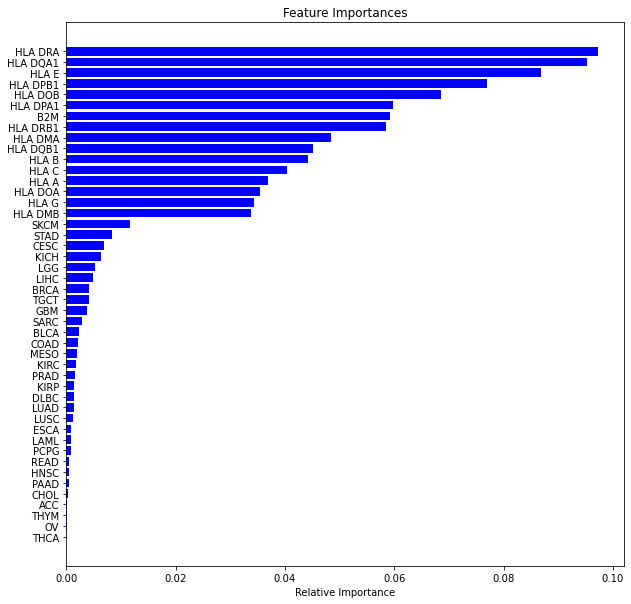

In [13]:
# Random forest generate feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)
fig=plt.figure(figsize(10,10))
feature_names=['HLA A', 'HLA B', 'HLA C', 'HLA E', 'HLA G', 'B2M',
       'HLA DRA', 'HLA DRB1', 'HLA DQA1', 'HLA DQB1',
       'HLA DPA1', 'HLA DPB1', 'HLA DMA', 'HLA DMB',
       'HLA DOA', 'HLA DOB', 'ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL',
       'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 'LAML',
       'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
       'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS',
       'UVM']

title('Feature Importances')
barh(range(len(indices)), importances[indices], color='b', align='center')
yticks(range(len(indices)), np.array(feature_names)[np.argsort(importances)])
xlabel('Relative Importance');
fig.savefig('feature_importance.png')

In [14]:
# logistic regression / random forest
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
roc_auc = auc(fpr, tpr)

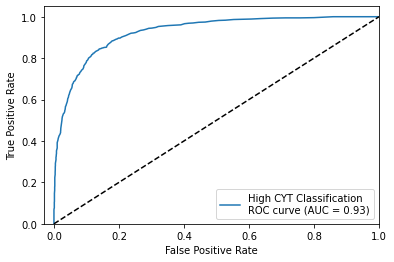

In [15]:
fig=plt.figure(figsize(6,4))
plt.plot(fpr, tpr, label='High CYT Classification\nROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fig.savefig('CYT.png')